# Data Exploration Tutorial - Univariate & Bivariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

plt.style.use('ggplot')

blue_color =  '#7F7FFF'
red_color = '#BF3F7F'
green_color = '#9ACD32'

In [2]:
churned = pd.read_csv('C:/10academy/JH_Contents/week2_tuto/Churned_Employees.csv')
current = pd.read_csv('C:/10academy/JH_Contents/week2_tuto/Current_Employees.csv')
churned['left']='0'
current['left']='1'
data = pd.concat([churned,current], axis=0)
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [3]:
print("Number of rows: {}".format(data.shape[0]))
print("Number of columns: {}\n".format(data.shape[1]))

print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------\n")

print("Any NaN values in data: " + str(data.isnull().values.any()))

data.head()

Number of rows: 14999
Number of columns: 11

Column Names:
----------------
Emp ID (int64)
satisfaction_level (float64)
last_evaluation (float64)
number_project (int64)
average_montly_hours (int64)
time_spend_company (int64)
Work_accident (int64)
promotion_last_5years (int64)
dept (object)
salary (object)
left (object)
----------------

Any NaN values in data: False


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [4]:
data=data.rename(columns = {'dept':'department'})
data.columns = [x.lower() for x in data.columns]

data['emp id'] = data['emp id'].astype('str')
data['work_accident'] = data['work_accident'].astype('str')
data['promotion_last_5years'] = data['promotion_last_5years'].astype('str')

print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------")

data.head(8)

Column Names:
----------------
emp id (object)
satisfaction_level (float64)
last_evaluation (float64)
number_project (int64)
average_montly_hours (int64)
time_spend_company (int64)
work_accident (object)
promotion_last_5years (object)
department (object)
salary (object)
left (object)
----------------


,emp id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0
5,6,0.41,0.50,2,153,3,0,0,sales,low,0
6,7,0.10,0.77,6,247,4,0,0,sales,low,0
7,8,0.92,0.85,5,259,5,0,0,sales,low,0


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
numerical_feature=newdf.columns
newdf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


### General Univariate & Bivariate exploration

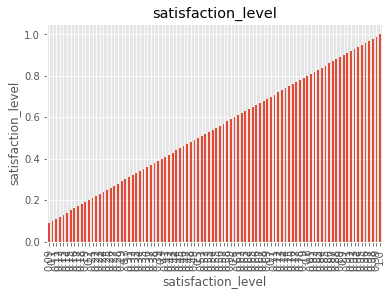

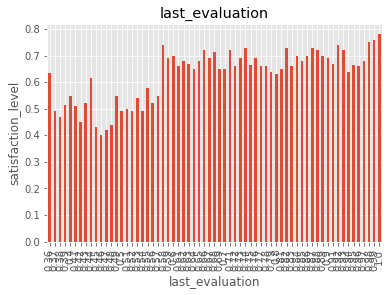

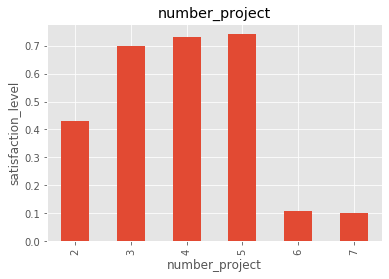

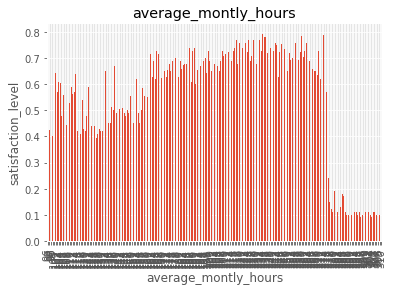

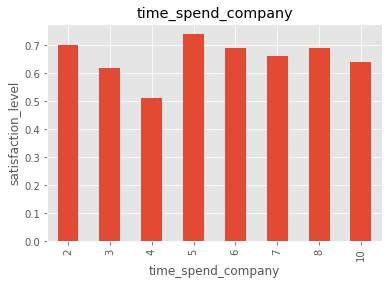

In [6]:
### satisfaction_level vs other quantitative
for feature in numerical_feature:
    data_copy=data.copy()
    data.groupby(feature)['satisfaction_level'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('satisfaction_level')
    plt.title(feature)
    plt.show()

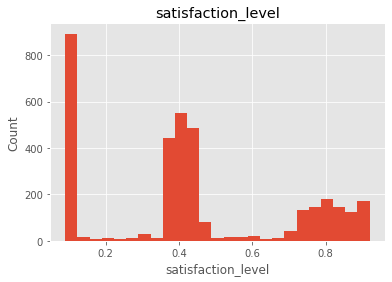

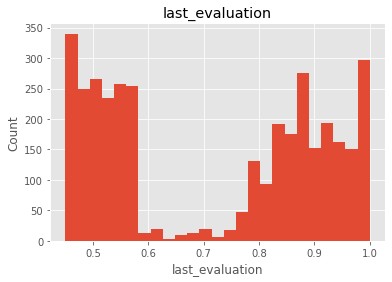

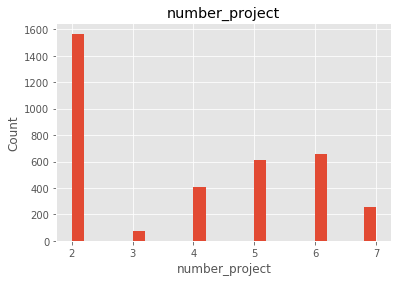

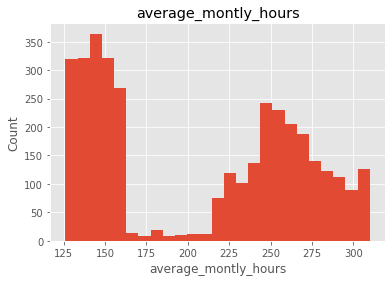

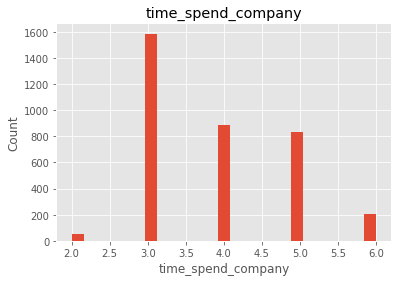

In [7]:
for feature in numerical_feature:
    data=churned.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [8]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['dept', 'salary', 'left'], dtype='object')

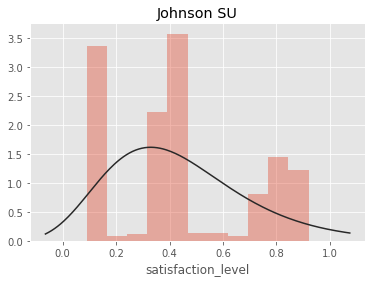

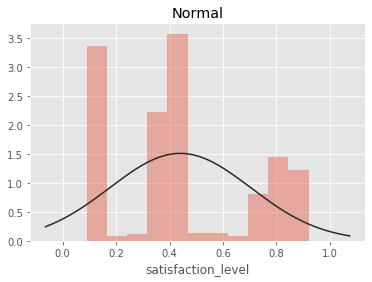

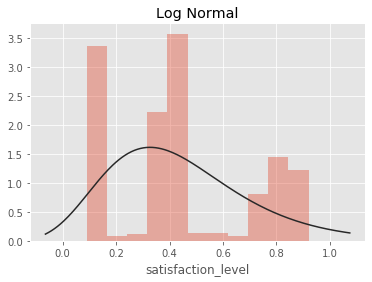

In [9]:
### Fitting some distributions for the satisfaction_level
y = data['satisfaction_level']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

### Deep analysis

### 1: Satisfaction Level & Left Status
* Plot Histogram on Satisfaction Level
* Plot Bar chart of Left Status
* Fill Histogram bars of Satisfaction level with employees who left.

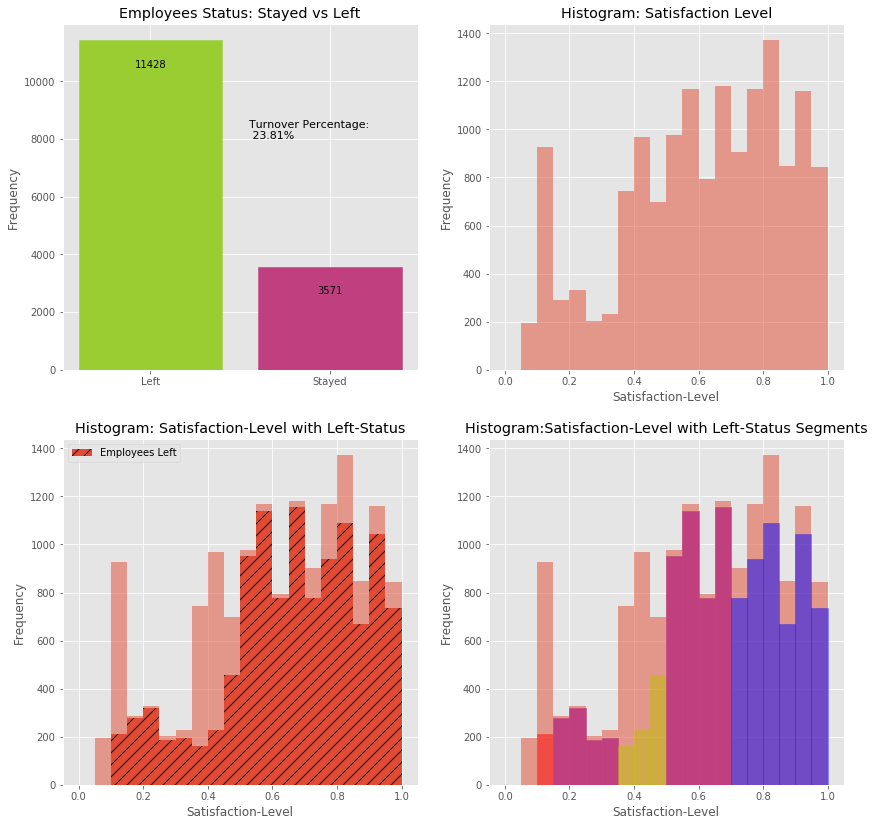

5.964715765891907
23.718846261551384
147.12965555866703


In [46]:
import copy

##########################################################
# Create fiure with 4 subplots
f, ax = plt.subplots(2,2,figsize=(14,14))

(ax1, ax2, ax3, ax4) = ax.flatten()

##########################################################
# Bar Chart of Left Column
left_count = data['left'].value_counts()
left_indices = left_count.index.tolist()
left_values = left_count.values.tolist()

if (left_indices[0] == '1'):
    left_indices[0] = 'Left'
    left_indices[1] = 'Stayed'
else:
    left_indices[0] = 'Stayed'
    left_indices[1] = 'Left'
    
y_pos = np.arange(len(left_values))    
bars=ax1.bar(y_pos, left_values, align='center')

bars[0].set_color(green_color)
bars[1].set_color(red_color)

# Add counts on Bars
def autolabel(rects):
    for rect in rects:
        ax1.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height()-1000,
                '%d' % int(rect.get_height()),
                ha='center', va='bottom')
autolabel(bars)

# Add Text showing percentage of employees who left
emp_left = left_values[1]
perc_left = emp_left/sum(left_values) * 100.
ax1.text(0.55, 8000, "Turnover Percentage:\n {:.2f}%".format(perc_left), fontsize=11)

ax1.set_xticks(y_pos)
ax1.set_xticklabels(left_indices)
ax1.set_ylabel('Frequency')
ax1.set_title('Employees Status: Stayed vs Left')


##########################################################
# Histogram of Satisfaction Level: I want 20 bins in range (0-1)
ax2.hist(data['satisfaction_level'], bins=20, range=(0,1), alpha=0.5)
ax2.set_title('Histogram: Satisfaction Level')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Satisfaction-Level')


##########################################################


n, bins, patches = ax3.hist(data['satisfaction_level'], bins=20, range=(0,1), alpha=0.5)
## 
left_in_bins = []
for i in range(len(bins)-1):
    start = bins[i]
    end = bins[i+1]
    
    left_emp = len(data.loc[(data['satisfaction_level']>=start) & (data['satisfaction_level']<end) & (data['left'] == '1')])
    left_in_bins.append(left_emp)


index = 0
for_legend = None
for p in patches:
    patch = copy.copy(p)
    patch.set_height(left_in_bins[index])
    #patch.set_color(red_color)
    patch.set_hatch('//')
    patch.set_alpha(1.0)
    ax3.add_patch(patch)
    if index==1:
        for_legend = patch
    index = index + 1
ax3.set_title('Histogram: Satisfaction-Level with Left-Status')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Satisfaction-Level')
ax3.legend([for_legend], ['Employees Left'])

##########################################################

n, bins, patches = ax4.hist(data['satisfaction_level'], bins=20, range=(0,1), alpha=0.5)
## 
left_in_bins = []
for i in range(len(bins)-1):
    start = bins[i]
    end = bins[i+1]
    
    left_emp = len(data.loc[(data['satisfaction_level']>=start) & (data['satisfaction_level']<end) & (data['left'] == '1')])
    left_in_bins.append(left_emp)


index = 0
for p in patches:
    patch = copy.copy(p)
    patch.set_height(left_in_bins[index])
    if index in range(3):
        patch.set_color('r')
    elif index in range(7,10):
        patch.set_color('y')
    elif index in range(14,20):
        patch.set_color('b')
        
    else:
        patch.set_color(red_color)
        patch.set_alpha(1.0)
    ax4.add_patch(patch)
    index = index + 1
ax4.set_title('Histogram:Satisfaction-Level with Left-Status Segments')
ax4.set_xlabel('Satisfaction-Level')
ax4.set_ylabel('Frequency')

plt.show()

seg_one_left = sum(left_in_bins[0:3])
print((seg_one_left/emp_left) * 100.)

seg_two_left = sum(left_in_bins[7:10])
print((seg_two_left/emp_left) * 100.)

seg_three_left = sum(left_in_bins[14:20])
print((seg_three_left/emp_left) * 100.)

This is interesting. We can clearly see three segments or behaviors.

* First bin in histogram is empty. Second and Third mostly contains people who left the company. These people must be really unhappy since their satisfaction level is below 0.15. (1st-Segment) 25.4% of total Employees who left
* Then we see peaks around 0.4. (2nd-Segment) 43.8% of total Employees who left
* Lastly, there's a chunk 0.7-0.95 who left the company.(3rd-Segment) 26.1% of total Employees who left . That's almost 1/4th of employees who left.
* 94% of Employees who left are in these 3 segments.

### Hypothesis

* There could be multiple reasons for leaving a company and for 3rd-Segment I think satisfaction is not the criteria for leaving. There 'could be' other reasons like monthly hours, work accidents or promotion, which is not really reflected in Satisfaction Scores.
* The other two segments are behaviors i.e. certain employees hitting ~0.4 satisfaction threshold are likely to churn leave. At-least these two segments show that employees are not-satisfied unlike (3rd-Segment).
* Ideally, I think, Satisfaction levels should correspond to number of employees who are leaving. But it is really not the case here, for example, 3rd-Segment does not make sense.

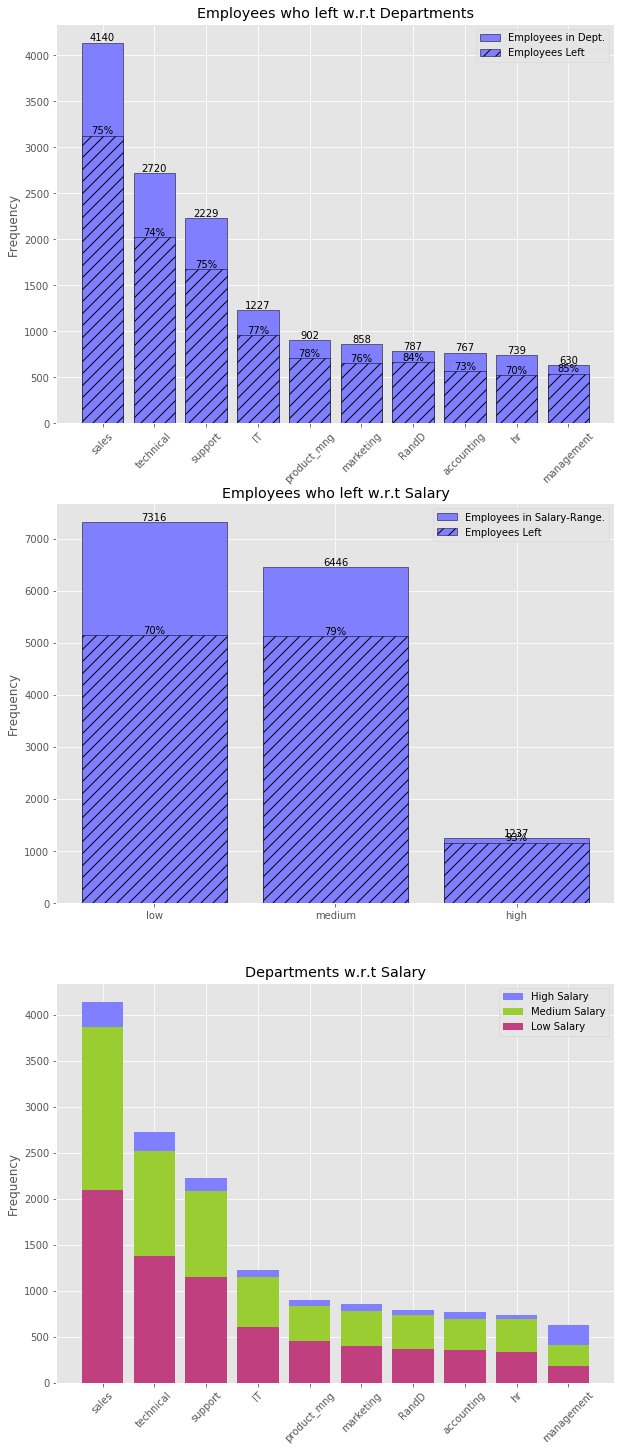

In [47]:
import copy 


##########################################################
# Create fiure with 3 subplots
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,25))

##########################################################
# Departments Bar Chart
dept_count = data['department'].value_counts()
dept_indices = dept_count.index.tolist()
dept_values = dept_count.values.tolist()

# Employees left in certain department
emp_left = []
for dept in dept_indices:
    left_emp = len(data.loc[(data['department']==dept) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees who left in certain department
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,dept_values)]


y_pos = np.arange(len(dept_values))
bars=ax1.bar(y_pos, dept_values, align='center', color=blue_color,edgecolor='black')
emp_left_bars=ax1.bar(y_pos, emp_left, align='center',color=blue_color,hatch='//',edgecolor='black')

# Add counts on Bars
def autolabel(rects, ax):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:d}".format(int(rect.get_height())),
                ha='center', va='bottom')
autolabel(bars, ax1)

# Add percentage on Bars
def autolabel_emp(rects, ax):
    index = 0
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:.0f}%".format(int(emp_left_perc[index])),
                ha='center', va='bottom')
        index = index + 1
autolabel_emp(emp_left_bars, ax1)
    

ax1.set_xticks(y_pos)
ax1.set_xticklabels(dept_indices)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax1.set_ylabel('Frequency')
ax1.set_title('Employees who left w.r.t Departments')
ax1.legend((bars[0], emp_left_bars[0]), ('Employees in Dept.', 'Employees Left'))

##########################################################
# Salary Bar Chart

sal_count = data['salary'].value_counts()
sal_indices = sal_count.index.tolist()
sal_values = sal_count.values.tolist()

# Employees left w.r.t salary
emp_left = []
for sal in sal_indices:
    left_emp = len(data.loc[(data['salary']==sal) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees who left in certain salary range
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,sal_values)]


y_pos = np.arange(len(sal_values))
bars=ax2.bar(y_pos, sal_values, align='center', color=blue_color,edgecolor='black')
emp_left_bars=ax2.bar(y_pos, emp_left, align='center',color=blue_color,hatch='//',edgecolor='black')

autolabel(bars,ax2)
autolabel_emp(emp_left_bars,ax2)

ax2.set_xticks(y_pos)
ax2.set_xticklabels(sal_indices)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.set_ylabel('Frequency')
ax2.set_title('Employees who left w.r.t Salary')
ax2.legend((bars[0], emp_left_bars[0]), ('Employees in Salary-Range.', 'Employees Left'))

##########################################################
dept_count = data['department'].value_counts()
dept_indices = dept_count.index.tolist()
dept_values = dept_count.values.tolist()

low_sal = []
med_sal = []
high_sal = []
for dept in dept_indices:
    low_sal.append(len(data.loc[(data['department']==dept) & (data['salary'] == 'low')]))
    med_sal.append(len(data.loc[(data['department']==dept) & (data['salary'] == 'medium')]))
    high_sal.append(len(data.loc[(data['department']==dept) & (data['salary'] == 'high')]))

y_pos = np.arange(len(dept_values))
low_bars=ax3.bar(y_pos, low_sal, align='center', color=red_color)
med_bars=ax3.bar(y_pos, med_sal, align='center', color=green_color,bottom=low_sal)
high_bars=ax3.bar(y_pos, high_sal, align='center', color=blue_color,bottom=np.add(low_sal, med_sal))

ax3.set_xticks(y_pos)
ax3.set_xticklabels(dept_indices)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)


ax3.set_ylabel('Frequency')
ax3.set_title('Departments w.r.t Salary')
ax3.legend((high_bars[0],med_bars[0],low_bars[0]), ('High Salary','Medium Salary','Low Salary'))

plt.show()

* **From the first graph**

Turnover rate (percentage of churned employees) of departments 'RandD' & 'Management' is lowest ~15%
Rest of them are roughly same, with 'HR' being the highest ~29%, when it comes to employee-churn

* **From the second graph**

Highly paid employees are less likely to leave the company, which is very intuitive.

* **Interesting Insights/Hypothesis**

'HR' is a tough department to be in.
'HR' is highest at employee turnover. It is the second-last department w.r.t employees strength or numbers (first graph). And within this small department, there are extremely small number of people getting high salaries (third graph), which means that the growth opportunity in 'HR' is very less and hence employees leave the company. Only 45 out of 739 'HR' employees are getting high salaries.

### 3: Promotion, Work-Accidents & No. of Project

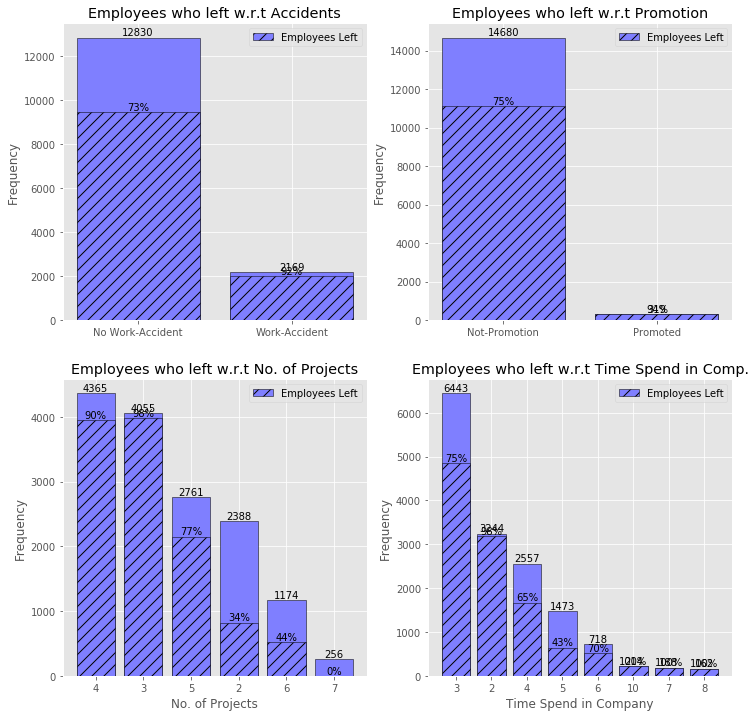

In [48]:
##########################################################
# Create fiure with 4 subplots
f, ax = plt.subplots(2,2,figsize=(12,12))

(ax1, ax2, ax3, ax4) = ax.flatten()

##########################################################
# Work-Accident Bar Chart
acc_count = data['work_accident'].value_counts()
acc_indices = acc_count.index.tolist()
acc_values = acc_count.values.tolist()


# Employees left w.r.t Accidents
emp_left = []
for acc in acc_indices:
    left_emp = len(data.loc[(data['work_accident']==acc) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees w.r.t Accidents
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,acc_values)]


y_pos = np.arange(len(acc_values))
bars=ax1.bar(y_pos, acc_values, align='center', color=blue_color, edgecolor='black')
emp_left_bars=ax1.bar(y_pos, emp_left, align='center', color=blue_color, hatch='//',edgecolor='black')

#ax1.

# Add counts on Bars
def autolabel(rects, ax):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:d}".format(int(rect.get_height())),
                ha='center', va='bottom')
autolabel(bars, ax1)

# Add percentage on Bars
def autolabel_emp(rects, ax):
    index = 0
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:.0f}%".format(int(emp_left_perc[index])),
                ha='center', va='bottom')
        index = index + 1
autolabel_emp(emp_left_bars, ax1)
    

ax1.set_xticks(y_pos)
#ax1.set_xticklabels(acc_indices)
ax1.set_xticklabels(["No Work-Accident","Work-Accident"])
ax1.set_ylabel('Frequency')
ax1.set_title('Employees who left w.r.t Accidents')
ax1.legend([emp_left_bars[0]], ['Employees Left'])

##########################################################
# Promotion Bar Chart
promo_count = data['promotion_last_5years'].value_counts()
promo_indices = promo_count.index.tolist()
promo_values = promo_count.values.tolist()


# Employees left w.r.t promotion
emp_left = []
for p in promo_indices:
    left_emp = len(data.loc[(data['promotion_last_5years']==p) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees w.r.t promotion
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,promo_values)]


y_pos = np.arange(len(promo_values))
bars=ax2.bar(y_pos, promo_values, align='center', color=blue_color, edgecolor='black')
emp_left_bars=ax2.bar(y_pos, emp_left, align='center', color=blue_color, hatch='//',edgecolor='black')

# Add counts on Bars
def autolabel(rects, ax):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:d}".format(int(rect.get_height())),
                ha='center', va='bottom')
autolabel(bars, ax2)

# Add percentage on Bars
def autolabel_emp(rects, ax):
    index = 0
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:.0f}%".format(int(emp_left_perc[index])),
                ha='center', va='bottom')
        index = index + 1
autolabel_emp(emp_left_bars, ax2)


ax2.set_xticks(y_pos)
ax2.set_xticklabels(["Not-Promotion","Promoted"])
ax2.set_ylabel('Frequency')
ax2.set_title('Employees who left w.r.t Promotion')
ax2.legend([emp_left_bars[0]], ['Employees Left'])

##########################################################
# No. of Projects Bar Chart
proj_count = data['number_project'].value_counts()
proj_indices = proj_count.index.tolist()
proj_values = proj_count.values.tolist()


# Employees left w.r.t No. of Projects
emp_left = []
for p in proj_indices:
    left_emp = len(data.loc[(data['number_project']==p) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees w.r.t No. of Projects
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,proj_values)]


y_pos = np.arange(len(proj_values))
bars=ax3.bar(y_pos, proj_values, align='center', color=blue_color, edgecolor='black')
emp_left_bars=ax3.bar(y_pos, emp_left, align='center', color=blue_color, hatch='//',edgecolor='black')

# Add counts on Bars
def autolabel(rects, ax):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:d}".format(int(rect.get_height())),
                ha='center', va='bottom')
autolabel(bars, ax3)

# Add percentage on Bars
def autolabel_emp(rects, ax):
    index = 0
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:.0f}%".format(int(emp_left_perc[index])),
                ha='center', va='bottom')
        index = index + 1
autolabel_emp(emp_left_bars, ax3)
    

ax3.set_xticks(y_pos)
ax3.set_xticklabels(proj_indices)
ax3.set_ylabel('Frequency')
ax3.set_xlabel('No. of Projects')
ax3.set_title('Employees who left w.r.t No. of Projects')
ax3.legend([emp_left_bars[0]], ['Employees Left'])

##########################################################
# Time Spend Bar Chart
spend_count = data['time_spend_company'].value_counts()
spend_indices = spend_count.index.tolist()
spend_values = spend_count.values.tolist()


# Employees left w.r.t Time Spend
emp_left = []
for ts in spend_indices:
    left_emp = len(data.loc[(data['time_spend_company']==ts) & (data['left'] == '1')])
    emp_left.append(left_emp)

# Percentage of employees w.r.t No. of Projects
emp_left_perc = [(ai/bi)*100. for ai,bi in zip(emp_left,spend_values)]


y_pos = np.arange(len(spend_values))
bars=ax4.bar(y_pos, spend_values, align='center', color=blue_color, edgecolor='black')
emp_left_bars=ax4.bar(y_pos, emp_left, align='center', color=blue_color, hatch='//',edgecolor='black')

# Add counts on Bars
def autolabel(rects, ax):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:d}".format(int(rect.get_height())),
                ha='center', va='bottom')
autolabel(bars, ax4)

# Add percentage on Bars
def autolabel_emp(rects, ax):
    index = 0
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height(),
                "{:.0f}%".format(int(emp_left_perc[index])),
                ha='center', va='bottom')
        index = index + 1
autolabel_emp(emp_left_bars, ax4)
    

ax4.set_xticks(y_pos)
ax4.set_xticklabels(spend_indices)
#ax3.set_xticklabels(["No Work-Accident","Work-Accident"])
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Time Spend in Company')
ax4.set_title('Employees who left w.r.t Time Spend in Comp.')
ax4.legend([emp_left_bars[0]], ['Employees Left'])


plt.show()

* Only 7% of all employees who had work-accident, left the company. Hence 'Work Accident' is not a strong indicator of Employee-Churn.
* Only 5% of all employees who got promoted churned away, as compared to 24% of employees who were not promoted, left the company. Hence promotion is a strong indicator of retaining employees. This is intuitive.

**For the next two graphs, I know values on x-axis should be in order, I'll fix it later**

* It is interesting to see that employees with 2, 6 or 7 projects left the company the most. 6 & 7 makes sense i.e. employees quit because of high workload. But it doesn't make sense when No. of Projects = 2. This requires further exploration

* As far as 'Time Spent in Company' is concerned, employees with 6+ years (in company) tend to stay. Employees with 3,4 & 5 years (in company) tend to leave.

### 4: Avg. Monthly hours & last evaluation

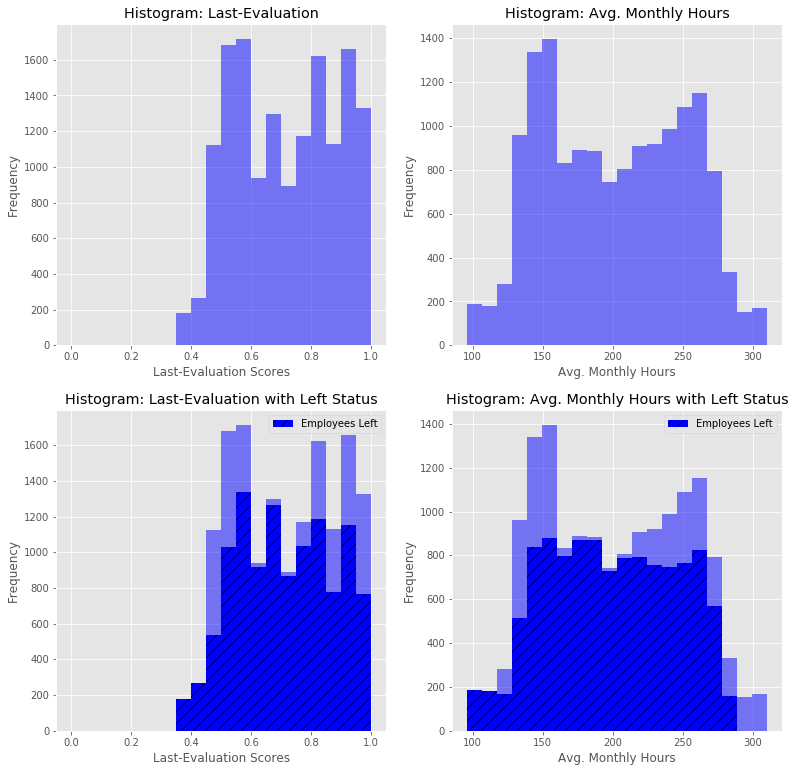

In [50]:
##########################################################
# Create fiure with 4 subplots
f, ax = plt.subplots(2,2,figsize=(13,13))

(ax1, ax2 , ax3, ax4) = ax.flatten()

##########################################################
# Histogram of Last Eval: I want 20 bins in range (0-1)
ax1.hist(data['last_evaluation'], bins=20, range=(0,1), alpha=0.5, color='b')
ax1.set_title('Histogram: Last-Evaluation')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Last-Evaluation Scores')



##########################################################
# Histogram of Avg. Monthly Hours: I want 20 bins 
ax2.hist(data['average_montly_hours'], bins=20, alpha=0.5, color='b')
ax2.set_title('Histogram: Avg. Monthly Hours')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Avg. Monthly Hours')

##########################################################
# Histogram of Last Eval: I want 20 bins in range (0-1)
n, bins, patches = ax3.hist(data['last_evaluation'], bins=20, range=(0,1), alpha=0.5, color='b')
left_in_bins = []
for i in range(len(bins)-1):
    start = bins[i]
    end = bins[i+1]
    
    left_emp = len(data.loc[(data['last_evaluation']>=start) & (data['last_evaluation']<end) & (data['left'] == '1')])
    left_in_bins.append(left_emp)

index = 0
for_legend = None
for p in patches:
    patch = copy.copy(p)
    patch.set_height(left_in_bins[index])
    #patch.set_color(red_color)
    patch.set_hatch('//')
    patch.set_alpha(1.0)
    ax3.add_patch(patch)
    if index==1:
        for_legend = patch
    index = index + 1

ax3.set_title('Histogram: Last-Evaluation with Left Status')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Last-Evaluation Scores')
ax3.legend([for_legend], ['Employees Left'])
 
##########################################################
# Histogram of Avg. Monthly Hours: I want 20 bins 
n, bins, patches = ax4.hist(data['average_montly_hours'], bins=20, alpha=0.5, color='b')
left_in_bins = []
for i in range(len(bins)-1):
    start = bins[i]
    end = bins[i+1]
    
    left_emp = len(data.loc[(data['average_montly_hours']>=start) & (data['average_montly_hours']<end) & (data['left'] == '1')])
    left_in_bins.append(left_emp)

index = 0
for_legend = None
for p in patches:
    patch = copy.copy(p)
    patch.set_height(left_in_bins[index])
    #patch.set_color(red_color)
    patch.set_hatch('//')
    patch.set_alpha(1.0)
    ax4.add_patch(patch)
    if index==1:
        for_legend = patch
    index = index + 1
ax4.set_title('Histogram: Avg. Monthly Hours with Left Status')
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Avg. Monthly Hours')
ax4.legend([for_legend], ['Employees Left'])

plt.show()

* We see bi-modal distribution in both 'Last-Evaluation' & 'Avg. Monthly Hours' histograms.
* Further, we can see bi-modal distribution of churned-employees within these two histograms.
* Employees with lower 'Last-Evaluation' left the company. But it's a little ambiguous why employees with high 'Last-Evaluation' left. While employees with 0.6-0.8 evaluation score tend to stay.
* Employees with very high working hours tend to leave the company, which makes sense, I could further check what salaries they are getting.

### Interesting Questions worth exploring
1. Why Highly-Satisfied employees are leaving the company?
2. Why employees with 2 years in the company tend to stay?
3. Why employees with high last-evaluation are leaving the company?
4. What are the salaries of employees working high No. of hours monthly?

### 1. Why portion of Highly-Satisfied employees are leaving the company? i.e. 3rd Segment, which we identified
* Explore High-Satisfaction Churners
* Explore High-Satisfaction Churners with High-Salary
* Explore High-Satisfaction Churners who got promoted
Subset the data, analyse only those employees who:
* Left the company
* Satisfaction-Level between 0.7 and 0.95

No. of Employees Left (with High Satisfaction) 4534
low       2059
medium    2039
high       436
Name: salary, dtype: int64
0    4404
1     130
Name: promotion_last_5years, dtype: int64
3     2131
2     1337
4      619
5      137
6      120
7       70
8       66
10      54
Name: time_spend_company, dtype: int64
4    1697
3    1643
5     853
2     243
6      98
Name: number_project, dtype: int64


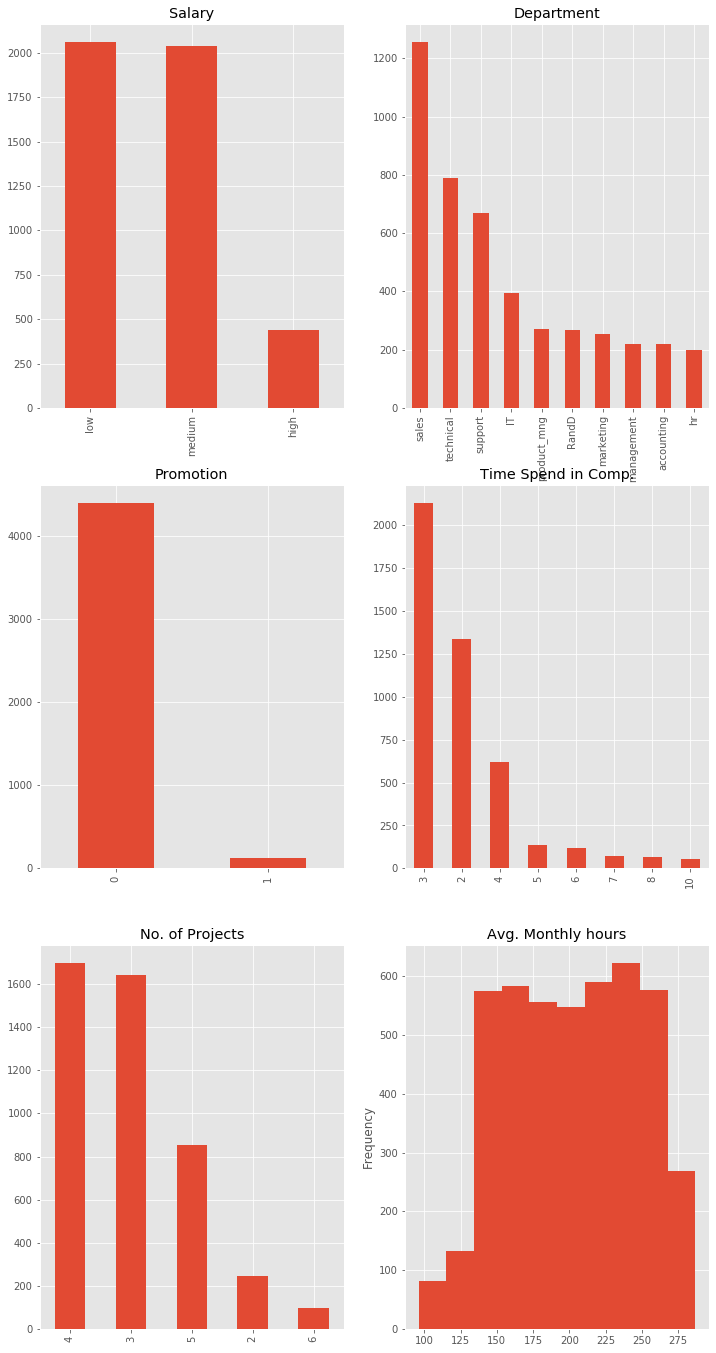

0    403
1     33
Name: promotion_last_5years, dtype: int64


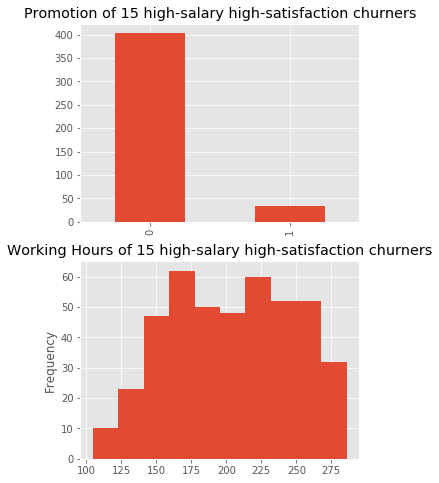

130


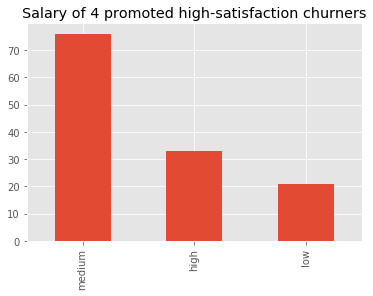

In [53]:
high_sat_churners = data[(data['satisfaction_level']>=0.7) & (data['satisfaction_level']<0.95) & (data['left'] == '1')]
print("No. of Employees Left (with High Satisfaction) {:d}".format(len(high_sat_churners)))

f, ax = plt.subplots(3,2,figsize=(12,24))
(ax1, ax2, ax3, ax4, ax5, ax6) = ax.flatten()

##########################################################
# Explore High-Satisfaction Churners

high_sat_churners['salary'].value_counts().plot(kind='bar', ax=ax1, title='Salary')
high_sat_churners['department'].value_counts().plot(kind='bar', ax=ax2, title='Department')
high_sat_churners['promotion_last_5years'].value_counts().plot(kind='bar', ax=ax3, title='Promotion')
high_sat_churners['time_spend_company'].value_counts().plot(kind='bar', ax=ax4, title='Time Spend in Comp.')
high_sat_churners['number_project'].value_counts().plot(kind='bar', ax=ax5, title='No. of Projects')
high_sat_churners['average_montly_hours'].plot(kind='hist', ax=ax6, title='Avg. Monthly hours')

print(high_sat_churners['salary'].value_counts())
print(high_sat_churners['promotion_last_5years'].value_counts())
print(high_sat_churners['time_spend_company'].value_counts())
print(high_sat_churners['number_project'].value_counts())

#print(high_sat_churners['average_montly_hours'].value_counts())

plt.show()

##########################################################
# Explore High-Satisfaction Churners with High-Salary

f, ax = plt.subplots(2,1,figsize=(5,8))
(ax1, ax2) = ax.flatten()
high_sal_high_sat_churners = data[(data['satisfaction_level']>=0.7) & (data['satisfaction_level']<0.95) & (data['left'] == '1') & (data['salary'] == 'high')]
print(high_sal_high_sat_churners['promotion_last_5years'].value_counts())
high_sal_high_sat_churners['promotion_last_5years'].value_counts().plot(kind='bar', title='Promotion of 15 high-salary high-satisfaction churners', ax=ax1)
high_sal_high_sat_churners['average_montly_hours'].plot(kind='hist', title='Working Hours of 15 high-salary high-satisfaction churners', ax=ax2)

plt.show()

##########################################################
# Explore High-Satisfaction Churners who got promoted

plt.figure()
promoted_high_sat_churners = data[(data['satisfaction_level']>=0.7) & (data['satisfaction_level']<0.95) & (data['left'] == '1') & (data['promotion_last_5years'] == '1')]
print(len(promoted_high_sat_churners))
promoted_high_sat_churners['salary'].value_counts().plot(kind='bar', title='Salary of 4 promoted high-satisfaction churners')
plt.show()

### Dissection of Highly-Satisfied-Churned-Employees.

* There were 943 such employees (High-Satisfaction Churners)
* There were 688 / 943 working for 5 years. Only 4 out of 943 got promoted in last 5 years. Major reason to leave the company i.e. Not got promoted
* Most of these 943 employees were working very high number of avg. monthly hours.
* Only 15 out of these 943 employees were getting high pay and were all working for 5 years in company but without promotion. And all of these 15 were working more than 220 Avg. Monthly hours. High Avg. Monthly Hours
* It is interesting to see 4 / 943, who got promoted in last 5 years (which means they were working for 5 years), not one of them was getting High-Salary.
* All of this analysis suggests: Although these employees were highly satisfied for a some reasons, they were not entirely happy. Satisfaction scores for these people did not reflect that Satisfaction.

*It looks like turn-over is function of all these variables:*

1. No promotion in 5 years -> Leave
2. High Salary but No-Promotion + High-working-hours -> Leave
3. Promotion but Not High-Salary -> Leave